# 泰坦尼克号 数据处理与分析

In [44]:
import pandas as pd

%matplotlib inline

### 导入数据

In [49]:
file_path = r'D:\ANACONDA_1\py_kecheng\train.csv'

titanic = pd.read_csv(file_path)


### 快速预览


In [50]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 单词翻译


* pclass 社会阶层(1.精英;2.中层;3,船员/劳苦大众)
* surived 是否幸存
* name 名字
* sex 性别
* age 年龄
* sibsp 兄弟姐妹配偶个数 sibling spouse
* parch 父母女儿个数
* ticket 船票号
* fare 船票价钱
* cabin 船舱
* emberked 登船口

In [1]:
# 差看多少数据
titanic.info()

NameError: name 'titanic' is not defined

In [53]:
#把所有数值类型的数据做一个简单的统计
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
# 统计None值个数
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 处理空值


In [2]:
# 可以填充整个dataframe里边的空值,可以取消注释,实验一下
# titanic.fillna(0)

# 单独选择一列进行空值填充,可以取消注释,实验一下
# titanic.Age.fillna(0)

# 年龄的中位数
titanic.Age.median()

# 按年龄的中位数去填充,此时是返回一个新的Series
# titanic.Age.fillna(titanic.Age.median)

# 直接填充,并不返回新的Series
titanic.Age.fillna(titanic.Age.median(),inplace=True)

# 再次查看age的空值
titanic.isnull().sum()

NameError: name 'titanic' is not defined

## 尝试从性别进行分析

### 做简单的汇总统计,经常用到]



In [76]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [77]:
# 生还者中,男女的人数
survived = titanic[titanic.Survived == 1].Sex.value_counts()

In [78]:
# 未生还者中,男女的人数
dead = titanic[titanic.Survived == 0].Sex.value_counts()

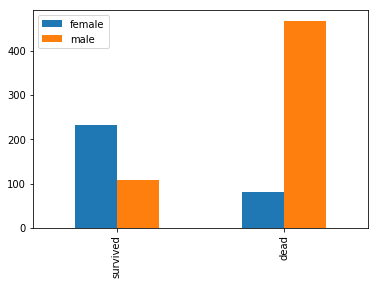

In [81]:
df = pd.DataFrame([survived,dead],index = ['survived','dead'])
df.plot.bar()

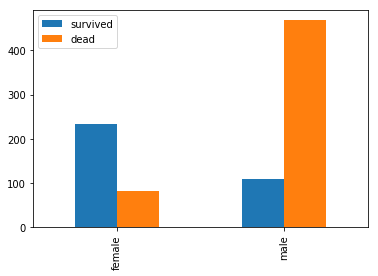

In [82]:
# 绘制的图片不是想要的效果
# 把 dataframe转置一下,就是行列替换 
df = df.T
df.plot.bar()  # df.plot(kind = 'bar')#等价的

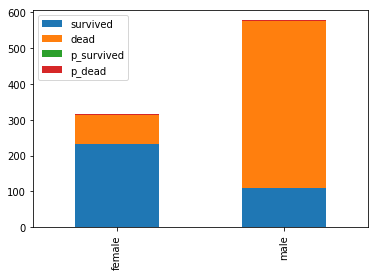

In [86]:
# 仍然不是想要的结果
df.plot(kind='bar',stacked = True)

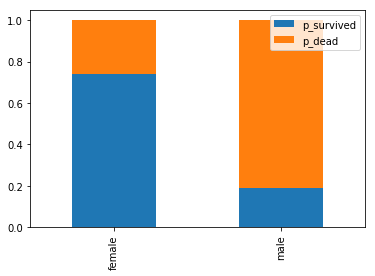

In [85]:
# 男女中生还者的比例情况
df['p_survived'] = df.survived / (df.survived + df.dead)
df['p_dead'] = df.dead / (df.survived + df.dead)
df[['p_survived','p_dead']].plot.bar(stacked = True)

### 通过上述图片看出,性别特征对是否生还影响挺大的

## 从年龄进行分析

In [88]:
# 简单统计
# titanic.Age.value_counts()

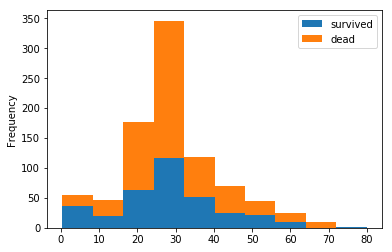

In [90]:
survived = titanic[titanic.Survived == 1].Age
dead = titanic[titanic.Survived == 0].Age
df = pd.DataFrame([survived,dead],index = ['survived','dead'])
df = df.T
df.plot.hist(stacked = True)

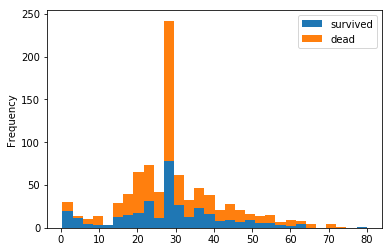

In [91]:
# 直方图柱子显示多一点
df.plot.hist(stacked = True,bins=30)
# 中间很高的柱子是把空值替换成了中位数

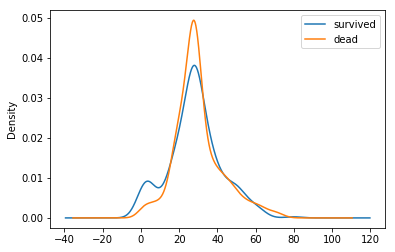

In [92]:
# 密度图  更直观一点
df.plot.kde()

In [93]:
# 查看年龄的分布,来绝对 图片横轴的取值范围
titanic.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

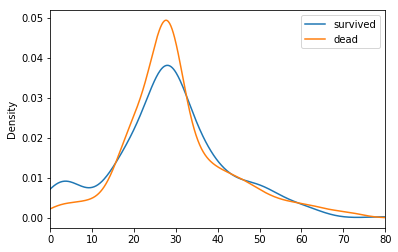

In [94]:
# 限定方位
df.plot.kde(xlim = (0,80))

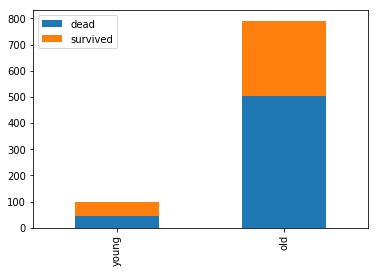

In [95]:
age = 16
young = titanic[titanic.Age <= age]['Survived'].value_counts()
old = titanic[titanic.Age > age]['Survived'].value_counts()
df = pd.DataFrame([young,old],index=['young','old'])
df.columns = ['dead','survived']
df.plot.bar(stacked = True)

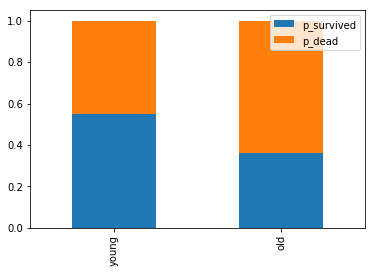

In [97]:
#  男女中生还者的比例情况
df['p_survived'] = df.survived / (df.survived + df.dead)
df['p_dead'] = df.dead / (df.survived + df.dead)
df[['p_survived','p_dead']].plot.bar(stacked = True)

# 分析票价


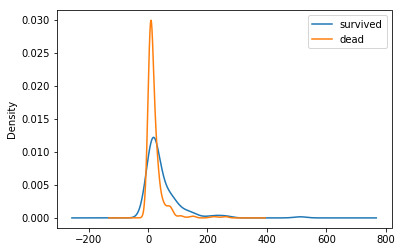

In [98]:
# 票价跟年龄特征相似
survived = titanic[titanic.Survived == 1].Fare
dead = titanic[titanic.Survived == 0].Fare
df = pd.DataFrame([survived,dead],index=['survived','dead'])
df = df.T
df.plot.kde()

In [99]:
# 设定xlim范围,先查看票价的范围
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

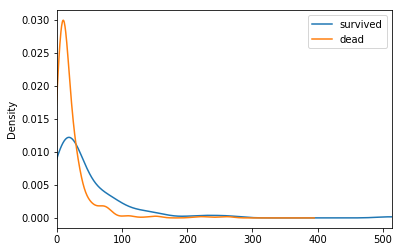

In [100]:
df.plot(kind='kde',xlim=(0,513))

* 可以看出低票价的人的生还率低


# 组合特征

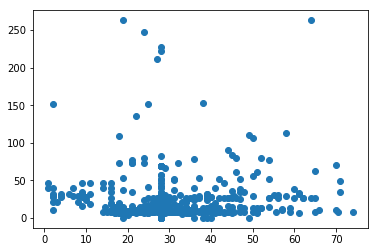

In [101]:
# 比如同时查看年龄和票价对生还率的影响
import matplotlib.pyplot as plt

plt.scatter(titanic[titanic.Survived == 0].Age,titanic[titanic.Survived == 0].Fare)

In [102]:
# 不美观

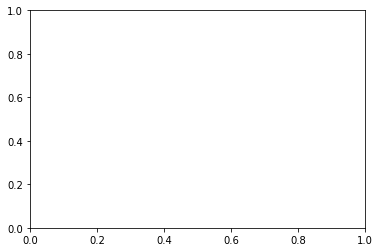

In [108]:
ax = plt.subplot()

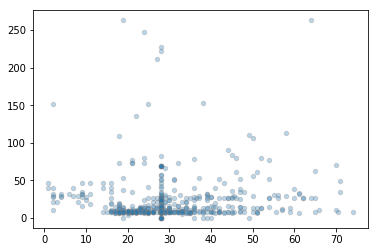

In [109]:
# 未生还者
age = titanic[titanic.Survived == 0].Age
fare = titanic[titanic.Survived == 0].Fare
plt.scatter(age,fare,s = 20, marker='o',alpha=0.3,linewidths=1,edgecolors='gray')

Text(3.2,0.5,'fare')

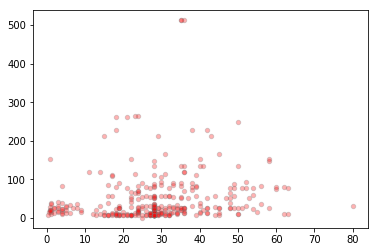

In [110]:
#生还者
age = titanic[titanic.Survived == 1].Age
fare = titanic[titanic.Survived == 1].Fare
plt.scatter(age,fare,s = 20,marker='o',alpha=0.3,linewidths=1,edgecolors='gray',c = 'red')

ax.set_xlabel('age')
ax.set_ylabel('fare')

Text(0,0.5,'fare')

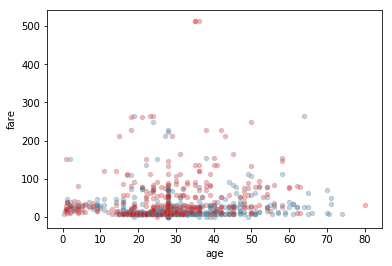

In [111]:
ax = plt.subplot()

# 未生还者
age = titanic[titanic.Survived == 0].Age
fare = titanic[titanic.Survived == 0].Fare
plt.scatter(age,fare,s = 20, marker='o',alpha=0.3,linewidths=1,edgecolors='gray')

#生还者
age = titanic[titanic.Survived == 1].Age
fare = titanic[titanic.Survived == 1].Fare
plt.scatter(age,fare,s = 20,marker='o',alpha=0.3,linewidths=1,edgecolors='gray',c = 'red')

ax.set_xlabel('age')
ax.set_ylabel('fare')

# 隐含特征‘

In [112]:
titanic.Name.describe()

count                              891
unique                             891
top       Panula, Master. Urho Abraham
freq                                 1
Name: Name, dtype: object

In [113]:
titanic['title'] = titanic.Name.apply(lambda name:name.split(',')[1].split('.')[0].strip())

In [114]:
s = 'Williams,Mr. Howard Hugh "Harry"'
s.split(',')[-1].split('.')[0].strip()

'Mr'

In [115]:
titanic.title.value_counts()
# 例如有一个人被称为 Mr, 而年龄是不知道的，这个时候用 所有 Mr 的年龄平均值来替代，
# 而不是用之前最简单的所有数据的中位数

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Jonkheer          1
Sir               1
Mme               1
the Countess      1
Lady              1
Don               1
Ms                1
Capt              1
Name: title, dtype: int64

# gdp


In [116]:
# 夜光图，简单用灯光图的亮度来模拟 gbp

In [117]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [119]:
titanic['family_size'] = titanic.SibSp + titanic.Parch +1

In [120]:
titanic.family_size.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

In [121]:
def func(family_size):
    if family_size == 1:
        return 'Singleton'
    if family_size <= 4 and family_size >= 2:
        return 'SmallFamily'
    if family_size > 4:
        return 'LargeFamily'
    
titanic['family_size'] = titanic.family_size.apply(func)

In [122]:
titanic.family_size.value_counts()

Singleton      537
SmallFamily    292
LargeFamily     62
Name: family_size, dtype: int64